In [ ]:




















there are no null data. Country and region are having datatype as object. Happiness rank is integer and other attributes are float. Happiness score is out class which is number. Thus we are going to use regression algorithm. There are total 12 columns and Happiness score is out target variable or class and other are features or attributes.


df.isnull().sum()

there are no missing values in data

dfcor=df.corr()

dfcor

sns.heatmap(dfcor,cmap='Blues',annot=True)

there is high correlation between happiness score and Economy GDP per Capita,family and health and low correlation between happiness score, generosity and trust govt corruption. Happiness rank has negative correlation with standard error and happiness rank

df.columns

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('Advertising.csv')

In [8]:
df.shape

(200, 5)

There are 200 rows and 5 columns. The problem is a regression problem.

In [9]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


The target attribute is sales-continuous having float datatype.

In [10]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There are no null values

In [12]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values

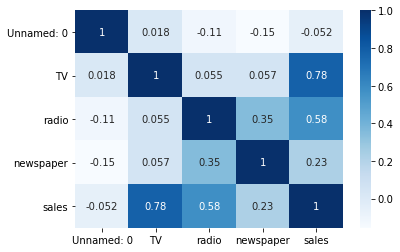

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

no multicolinearity observed

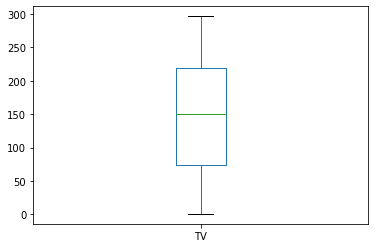

In [24]:
df['TV'].plot.box()

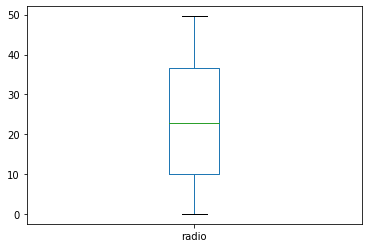

In [25]:
df['radio'].plot.box()

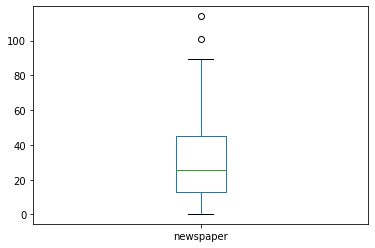

In [27]:
df['newspaper'].plot.box()

few outliers observed in newspaper

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df))

In [30]:
threshold=3

In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
df_new.shape

(198, 5)

In [33]:
Dataloss=((200-198)/200)*100

In [34]:
Dataloss

1.0

1% data loss. Use zscore dataframe

In [35]:
df=df_new

In [36]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [37]:
df.shape

(198, 5)

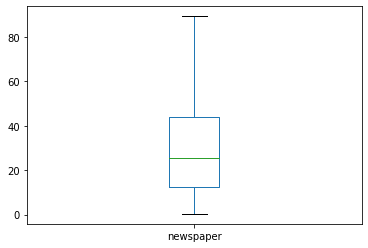

In [38]:
df['newspaper'].plot.box()

outlier removed

In [40]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

not high skewness present

In [46]:
x=df.drop(['sales'],axis=1)

In [47]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [48]:
y=df['sales']

In [49]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [50]:
x.shape

(198, 4)

In [51]:
y.shape

(198,)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
from sklearn.linear_model import Lasso,Ridge

In [56]:
from sklearn.svm import SVR

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
maxScore=0
maxRS=0

In [59]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    score=mod.score(x_train,y_train)
    mod.coef_
    pred=mod.predict(x_test)
    if score>maxScore:
        maxScore=score
        maxRS=i
print('Best score is ',maxScore,'on random state',maxRS)

Best score is  0.9238662209355055 on random state 10


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [61]:
lm=LinearRegression()

In [62]:
lm.fit(x_train,y_train)


LinearRegression()

In [63]:
lm.coef_

array([-0.00113046,  0.0444639 ,  0.19163352,  0.00130664])

In [64]:
lm.score(x_train,y_train)

0.9238662209355055

In [65]:
pred=lm.predict(x_test)

In [66]:
print('Sales is ',pred)

Sales is  [ 5.99641087 13.12425155 14.81421793 16.54112076 20.26355308 18.34052048
 14.97007191  8.97446828 17.96237386 12.92323766  7.26057222  7.34504492
  4.74469406 17.42155632 15.84785471 17.27073526 12.37439251  9.84845831
  8.19762856 12.63015977 18.29769035 10.75841094 16.85030442 13.30238176
 10.99923129  8.49277935 11.74458318 12.84183062 16.4151378   7.82529084
  4.64890891 16.54762948 14.02515495  4.77355582 23.50099058 12.1062417
 23.79542958 17.76390782 21.86491278 13.63493322 12.6994438  12.38201224
 17.14965259 10.02022937 18.24137801 10.07850475 20.32787899 15.02871669
 12.96679153 10.46225101 15.63168535  9.32205337 24.81391124  9.6542022
  6.94802636 23.07787449 13.93901106 10.85784417 14.83200569 12.74082865]


In [67]:
print('Mean Squared error is ',mean_squared_error(y_test,pred))

Mean Squared error is  4.977016846747298


In [68]:
print('Mean Absolute error is',mean_absolute_error(y_test,pred))

Mean Absolute error is 1.6270100342444695


In [69]:
from sklearn.metrics import r2_score

In [70]:
print(r2_score(y_test,pred))

0.8279695969630236


In [77]:
ls=Lasso(alpha=0.0001)

ls.fit(x_train,y_train)



lspred=ls.predict(x_test)

lspred

array([ 5.99642007, 13.12423547, 14.81422432, 16.54112065, 20.26354015,
       18.34051466, 14.97007566,  8.97446509, 17.96236956, 12.92322332,
        7.26058258,  7.34505139,  4.74470388, 17.42155499, 15.84786481,
       17.27072748, 12.37440073,  9.84846521,  8.19762794, 12.63017029,
       18.29769388, 10.75840837, 16.85030704, 13.30239128, 10.99922406,
        8.49278913, 11.7445808 , 12.84182153, 16.41513749,  7.82529559,
        4.64891858, 16.54762869, 14.0251547 ,  4.77356451, 23.50098417,
       12.1062463 , 23.79541963, 17.76391649, 21.86490601, 13.63494424,
       12.6994419 , 12.38201454, 17.14965463, 10.02023078, 18.24137729,
       10.07851132, 20.32787756, 15.02872659, 12.96679423, 10.4622521 ,
       15.63169281,  9.32205062, 24.81390103,  9.65420788,  6.94802636,
       23.07786325, 13.93901619, 10.85784738, 14.83200964, 12.74083519])

In [78]:
ls.score(x_train,y_train)

0.9238662209334398

In [72]:
print('Mean Absolute error is',mean_absolute_error(y_test,lspred))

Mean Absolute error is 1.6270102012047911


In [74]:
ls.coef_

array([-0.00113044,  0.0444639 ,  0.19163313,  0.00130653])

In [75]:
rd=Ridge(alpha=0.0001)

rd.fit(x_train,y_train)

rd.score(x_train,y_train)


0.9238662209355055

In [79]:
rd.coef_

array([-0.00113046,  0.0444639 ,  0.19163352,  0.00130664])

In [80]:
rdpred=rd.predict(x_test)

In [81]:
rdpred

array([ 5.99641088, 13.12425154, 14.81421794, 16.54112074, 20.26355307,
       18.34052048, 14.97007191,  8.97446827, 17.96237386, 12.92323765,
        7.26057223,  7.34504493,  4.74469408, 17.42155631, 15.84785472,
       17.27073525, 12.37439252,  9.84845832,  8.19762857, 12.63015978,
       18.29769036, 10.75841092, 16.85030442, 13.30238177, 10.99923128,
        8.49277935, 11.74458317, 12.84183061, 16.41513781,  7.82529083,
        4.64890892, 16.54762948, 14.02515494,  4.77355583, 23.50099056,
       12.10624171, 23.79542958, 17.76390782, 21.86491277, 13.63493323,
       12.69944378, 12.38201225, 17.14965259, 10.02022937, 18.241378  ,
       10.07850476, 20.32787897, 15.02871669, 12.96679153, 10.46225101,
       15.63168537,  9.32205337, 24.81391123,  9.6542022 ,  6.94802637,
       23.07787448, 13.93901108, 10.85784417, 14.83200569, 12.74082867])

In [82]:
print('Mean Absolute error is',mean_absolute_error(y_test,rdpred))

Mean Absolute error is 1.627010035697621


In [83]:
enr=ElasticNet(alpha=0.0001)

enr.fit(x_train,y_train)


ElasticNet(alpha=0.0001)

In [84]:
enr.score(x_train,y_train)

0.9238662209348254

In [85]:
enrpred=enr.predict(x_test)


In [88]:
enrpred



array([ 5.99641649, 13.12424287, 14.81422208, 16.54111972, 20.26354589,
       18.34051775, 14.97007396,  8.97446663, 17.96237151, 12.92322993,
        7.26057849,  7.34504907,  4.74469998, 17.42155466, 15.84786071,
       17.27073043, 12.37439709,  9.8484625 ,  8.19762857, 12.63016577,
       18.29769267, 10.75840854, 16.85030616, 13.30238727, 10.99922712,
        8.4927845 , 11.74458091, 12.84182556, 16.41513835,  7.82529315,
        4.64891465, 16.54762924, 14.02515441,  4.77356132, 23.50098613,
       12.10624441, 23.79542405, 17.76391248, 21.86490842, 13.63493948,
       12.69944157, 12.38201346, 17.14965396, 10.0202298 , 18.24137715,
       10.07850899, 20.32787744, 15.02872206, 12.96679299, 10.46225177,
       15.63169007,  9.3220521 , 24.81390495,  9.65420512,  6.94802706,
       23.07786827, 13.93901486, 10.85784629, 14.83200785, 12.74083308])

In [89]:
print('Mean Absolute error is',mean_absolute_error(y_test,enrpred))

Mean Absolute error is 1.6270102163770128


Best model is linear regression due to high score and least mean absolute error

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameter={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False]}

In [92]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [94]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}

In [95]:
Final_mod=LinearRegression(copy_X=True,fit_intercept=True,normalize=True,positive=True)

In [96]:
Final_mod.fit(x_train,y_train)

LinearRegression(normalize=True, positive=True)

In [97]:
pred=Final_mod.predict(x_test)

In [98]:
Final_mod.score(x_train,y_train)

0.923708293910713

In [99]:
import joblib

In [100]:
joblib.dump(Final_mod,'Advertising_sales.pkl')

['Advertising_sales.pkl']